**Neural Networks**  
**EE 258 – Fall 2021**  
**Class Project**  
  

**Classification of flower images**

**In this part of the code we have picked the best model and tried improving further**

In [ ]:
# Install and gathering all libraries needed

!pip install split-folders -q
!pip install --upgrade --ignore-installed kaggle -q

import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from keras.models import model_from_json
from sklearn.preprocessing import LabelBinarizer
import os
from imutils import paths
from tqdm import tqdm
from matplotlib.pyplot import imshow
import splitfolders
from tensorflow.keras.callbacks import EarlyStopping
from urllib.request import urlopen
from zipfile import ZipFile
import shutil 
from keras.models import Sequential

     |████████████████████████████████| 58 kB 2.6 MB/s 
     |████████████████████████████████| 149 kB 11.3 MB/s 
     |████████████████████████████████| 247 kB 25.9 MB/s 
     |████████████████████████████████| 62 kB 886 kB/s 
     |████████████████████████████████| 76 kB 5.9 MB/s 
     |████████████████████████████████| 138 kB 74.7 MB/s 
     |████████████████████████████████| 78 kB 8.4 MB/s 
     |████████████████████████████████| 61 kB 9.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
google-colab 1.0.0 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incom

In [ ]:
# Just save the path into variables, this is used to store and access the data after splitting
input_folder="./dataset/originalDataset"
output_folder="./dataset/projectDataset"

In [ ]:
# We are downloading the dataset from our github reop [https://github.com/chyavanphadke/Classification_of_flower_images]
# Firstly the github repo is downloaded as zip,
# Later the zip file is extracted in to project directory and only dataset folder is retained and rest is deleted
# if the dataset folder is already present then we are not downloading the dataset again.

if(os.path.exists("./dataset/projectDataset/train")):
    print("Dataset already Downloaded")
else:
    # Download the dataset zip file from github and extract into local repo
    zipurl = "https://codeload.github.com/chyavanphadke/Classification_of_flower_images/zip/refs/heads/main"
    zipresp = urlopen(zipurl)
    tempzip = open("./tempdatasetdownload.zip", "wb")
    tempzip.write(zipresp.read())
    tempzip.close()
    zf = ZipFile("./tempdatasetdownload.zip")
    zf.extractall(path = './dataset/')
    shutil.copytree("./dataset/Classification_of_flower_images-main/dataset/originalDataset", "./dataset/originalDataset");
    zf.close()
    splitfolders.ratio(input_folder,output=output_folder,seed=42,ratio=(0.7,0.2,0.1),group_prefix=None);
    !rm -rf /content/tempdatasetdownload.zip
    !rm -rf /content/dataset/Classification_of_flower_images-main

Copying files: 4317 files [00:00, 4506.61 files/s]


In [ ]:
#dataset path
train_path = "./dataset/projectDataset/train"

In [ ]:
# ImageDataGenerator to apply data augmentation, randomly translating, rotating, resizing.

train_datagen = ImageDataGenerator(rescale=1. / 255)
train_datagen.fill_mode='constant'
train_datagen.horizontal_flip=True
train_datagen.zoom_range=[0.8, 1.2]
train_datagen.rotation_range=20
train_datagen.shear_range=10
train_datagen.brightness_range = [0.75, 1.5]

train = train_datagen.flow_from_directory(train_path, target_size=(128,128), class_mode='categorical',shuffle=False)

Found 3019 images belonging to 5 classes.


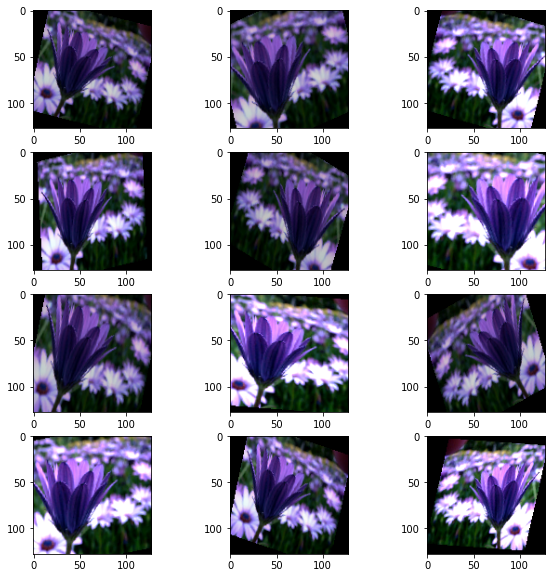

In [ ]:
# Plotting one image after augmentation
fig , axs = plt.subplots(4,3 ,figsize = (10,10))

axs[0][0].imshow(train[1][0][0])
axs[0][1].imshow(train[1][0][0])
axs[0][2].imshow(train[1][0][0])
axs[1][0].imshow(train[1][0][0])
axs[1][1].imshow(train[1][0][0])
axs[1][2].imshow(train[1][0][0])
axs[2][0].imshow(train[1][0][0])
axs[2][1].imshow(train[1][0][0])
axs[2][2].imshow(train[1][0][0])
axs[3][0].imshow(train[1][0][0])
axs[3][1].imshow(train[1][0][0])
axs[3][2].imshow(train[1][0][0])

In [ ]:
# This is the best model
# This is the Custom Model 3 that we discussed in the report

from keras.models import Sequential
model = Sequential()

# first convolutional layer with filters=24, kernal size=5X5, starides=2"
model.add(Conv2D(24, (5, 5), strides=(2,2), padding='same', activation='relu', input_shape=(128, 128, 3)))
# max pooling with filter size=3X3, and starides=2"
model.add(MaxPooling2D((3,3), strides=(2,2), padding='same'))

# second convolutional layer with filters=48, kernal size=5X5"
model.add(Conv2D(48, (5,5), padding='same', activation='relu'))
# max pooling with filter size=3X3, and starides=2"
model.add(MaxPooling2D((3,3), strides=(2,2), padding='same'))

# third convolutional layer with filters=95, kernal size=3X3"
model.add(Conv2D(96, (3,3), padding='same', activation='relu'))
# max pooling with filter size=3X3, and starides=2"
model.add(MaxPooling2D((3,3), strides=(2,2), padding='same'))
# convolutional layer with filters=120, kernal size=3X3"
model.add(Conv2D(120, (3,3), padding='same', activation='relu'))
# max pooling with filter size=3X3, and starides=2"
model.add(MaxPooling2D((3,3), strides=(2,2), padding='same'))

# flatten the input feature map. here it flattens the last feature map before it
model.add(Flatten())
model.add(Dense(384, activation='relu'))
# use softmax activation for classification
model.add(Dense(5, activation='softmax'))

In [ ]:
# printing summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 24)        1824      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 24)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 48)        28848     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 48)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 96)        41568     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 96)         0

In [ ]:
from tensorflow.keras.optimizers import SGD, Adam
sgd = SGD(learning_rate=0.001, decay=1e-7, momentum=.9)

In [ ]:
# compiling model
model.compile(optimizer = sgd , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
# training our model
# we are using .fit method instead of .fit_generator because we have tensorflow 2.4.0
hist = model.fit(train,batch_size=256,epochs=200)

Epoch 1/200
95/95 [==============================] - 26s 185ms/step - loss: 1.6363 - accuracy: 0.2276
Epoch 2/200
95/95 [==============================] - 18s 187ms/step - loss: 1.6083 - accuracy: 0.2630
Epoch 3/200
95/95 [==============================] - 18s 186ms/step - loss: 1.6046 - accuracy: 0.2517
Epoch 4/200
95/95 [==============================] - 18s 187ms/step - loss: 1.5519 - accuracy: 0.3037
Epoch 5/200
95/95 [==============================] - 18s 186ms/step - loss: 1.4742 - accuracy: 0.3428
Epoch 6/200
95/95 [==============================] - 18s 187ms/step - loss: 1.4113 - accuracy: 0.3922
Epoch 7/200
95/95 [==============================] - 18s 186ms/step - loss: 1.3999 - accuracy: 0.4087
Epoch 8/200
95/95 [==============================] - 18s 187ms/step - loss: 1.3460 - accuracy: 0.4174
Epoch 9/200
95/95 [==============================] - 18s 186ms/step - loss: 1.3578 - accuracy: 0.4117
Epoch 10/200
95/95 [==============================] - 18s 187ms/step - loss: 1.265

In [ ]:
model.save("best_model.h5")

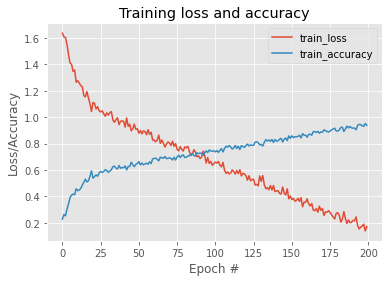

In [ ]:
import matplotlib.pyplot as plt
N = np.arange(0, 200)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, hist.history['loss'], label='train_loss')
plt.plot(N, hist.history['accuracy'], label='train_accuracy')
plt.title('Training loss and accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

In [ ]:
# loading validation data
path_test = "/content/dataset/projectDataset/train"
test_datagen = ImageDataGenerator(rescale=1. / 255)
test = test_datagen.flow_from_directory(path_test, target_size=(128,128), class_mode='categorical',shuffle=False)

Found 3019 images belonging to 5 classes.


In [ ]:
test_steps_per_epoch = np.math.ceil(test.samples / test.batch_size)

predictions = model.predict(test, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

In [ ]:
true_classes = test.classes
class_labels = list(test.class_indices.keys())


In [ ]:
# checking cross validation accuracy/test accuracy
preds = model.evaluate(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

Loss = 0.0217449386835098
Test Accuracy = 0.983701758384705


In [ ]:
import sklearn.metrics as metrics

In [ ]:
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

       daisy       0.95      0.97      0.96       152
   dandelion       0.98      0.98      0.98       210
        rose       0.97      0.97      0.97       156
   sunflower       0.98      0.97      0.97       146
       tulip       0.97      0.96      0.96       196

    accuracy                           0.97       860
   macro avg       0.97      0.97      0.97       860
weighted avg       0.97      0.97      0.97       860



In [ ]:
# Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(true_classes, predicted_classes)

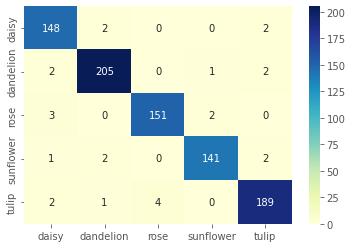

In [ ]:
import seaborn as sns
class_names=["daisy","dandelion","rose","sunflower","tulip"]
sns.heatmap(confusion_mtx, xticklabels=class_names, yticklabels=class_names, annot=True, fmt='d', cmap="YlGnBu")

In [ ]:
# loading prediction data

path_pred = "/content/dataset/projectDataset/train"
predict_datagen = ImageDataGenerator(rescale=1. / 255)
predict = predict_datagen.flow_from_directory(path_pred, target_size=(128,128),class_mode='categorical',shuffle=False)

Found 3019 images belonging to 5 classes.


In [ ]:
predictions = model.predict(predict)

In [ ]:
def get_category(predicted_output):
    path1 ="/content/dataset/projectDataset/train"
    return os.listdir(path1)[np.argmax(predicted_output)]

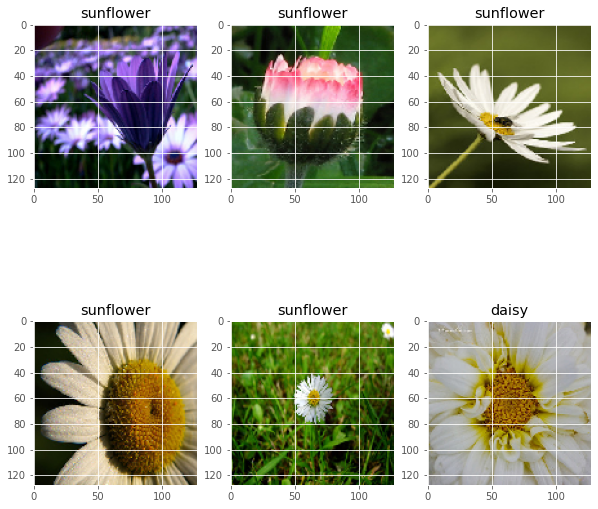

In [ ]:
fig , axs = plt.subplots(2,3 ,figsize = (10,10))

axs[0][0].imshow(predict[1][0][0])
axs[0][0].set_title(get_category(predictions[1]))
axs[0][1].imshow(predict[2][0][0])
axs[0][1].set_title(get_category(predictions[2]))
axs[0][2].imshow(predict[3][0][0])
axs[0][2].set_title(get_category(predictions[3]))
axs[1][0].imshow(predict[4][0][0])
axs[1][0].set_title(get_category(predictions[4]))
axs[1][1].imshow(predict[5][0][0])
axs[1][1].set_title(get_category(predictions[5]))
axs[1][2].imshow(predict[6][0][0])
axs[1][2].set_title(get_category(predictions[6]))


plt.show()